# Burlington, Vermont 2009 Mayoral Election 


* A very extensive analysis of this eleciton is available at [https://rangevoting.org/Burlington.html](https://rangevoting.org/Burlington.html)

* There are 6 candidate and 8980 voters. 
    1. Bob Kiss ($P$)
    2. Andy Montroll ($D$)
    3. James Simpson ($G$) 
    4. Dan Smith ($I$)
    5. Kurt Wright ($R$)
    6. Write-in ($W$)
  
* Ranked Choice was used to elect a single winner:  The winner was Bob Kiss. The Write-ins, Dan Smith, and James Simpson were elmeinted in Round 2.  Andy Montroll was elminated in Round 3.   This left Bob Kiss and Kurt Wright in the final round. 

* The processed rankings were downloaded from  [https://www.preflib.org/dataset/00005](https://www.preflib.org/dataset/00005).   The file contains incomplete total orders (a [toi file](https://www.preflib.org/format#types). 

* There was a Condorcet winner, $D$, was not elected by Ranked Choice. 


In [1]:
from pref_voting.profiles_with_ties import *
from pref_voting.voting_methods import *
from preflibtools.instances import OrdinalInstance # use the preflibtools 


In [4]:

short_candname = {
    "Bob Kiss": "P",
    "Andy Montroll": "D",
    "James Simpson": "G",
    "Dan Smith": "I",
    "Kurt Wright": "R",
    "Write-In": "W",
}

# Use preflibtools to process the file.
instance = OrdinalInstance()
instance.parse_file("./edata/burlingon_vt_2009/00005-00000002.toi")

rankings = list()
rcounts = list()
for order in instance.orders:
    
    rank = dict()
    
    for r,cs in enumerate(order): 
        for c in cs: 
            rank[c] = r + 1
    rankings.append(rank)
    rcounts.append(instance.multiplicity[order])

cmap = dict()
for alt, alt_name in instance.alternatives_name.items():
    cmap[alt] = short_candname[alt_name]
    if alt_name == 'Bob Kiss': 
        rc_winner = alt
    
prof = ProfileWithTies(rankings, 
                       rcounts = rcounts, 
                       cmap=cmap,
                       candidates = list(cmap.keys()))

prof.report()

# uncomment to see the rankings
#prof.display_rankings()

# Use the extended strict preference in which all ranked candidates are strictly preferred 
# to all unranked candidates 
prof.use_extended_strict_preference()



There are 6 candidates and 8980 rankings:  
        The number of empty rankings: 0
        The number of rankings with ties: 6
        The number of linear orders: 0
        The number of truncated linear orders: 8974
        
The number of rankings with skipped ranks: 0
        
        


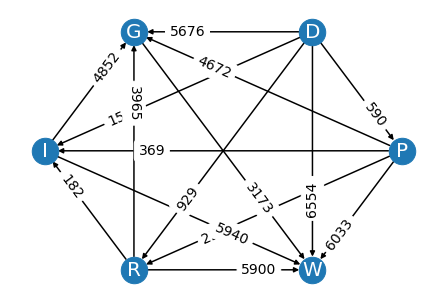

There are 0 cycles. 



In [5]:
prof.display_margin_graph()

prof.margin_graph().display_cycles()


In [6]:
def display_instant_runoff_results(prof): 
    
    rounds = list()
    
    remaining_candidates = prof.candidates
    
    while len(remaining_candidates) > 1: 
        reduced_prof = prof.remove_candidates([c for c in prof.candidates if c not in remaining_candidates])
        
        pl_scores = reduced_prof.plurality_scores_ignoring_overvotes()
        lowest_pl_score = min(pl_scores.values())
        cands_to_remove = [c for c in pl_scores.keys() if pl_scores[c] == lowest_pl_score]
        
        sorted_pl_scores = sorted(pl_scores.values(), reverse=True)
        sorted_cands = sorted(pl_scores.items(), reverse=True, key=lambda cpl: cpl[1])
        rounds.append('\n'.join([f"\t{prof.cmap[c]} plurality score: {pl_score}" for c, pl_score in sorted_cands]) + '\n' + f'\tThe candidate removed during this round: {reduced_prof.cmap[cands_to_remove[0]]}')
        remaining_candidates = [c for c in remaining_candidates if c not in cands_to_remove]
        
    for ridx, r in enumerate(rounds): 
        print(f"Instant Runoff round {ridx +1}")
        print(r)
        
    print(f"The winner is {prof.cmap[remaining_candidates[0]]}")
    


In [7]:
display_instant_runoff_results(prof)

Instant Runoff round 1
	R plurality score: 2951
	P plurality score: 2585
	D plurality score: 2063
	I plurality score: 1306
	W plurality score: 36
	G plurality score: 35
	The candidate removed during this round: G
Instant Runoff round 2
	R plurality score: 2955
	P plurality score: 2599
	D plurality score: 2067
	I plurality score: 1315
	W plurality score: 37
	The candidate removed during this round: W
Instant Runoff round 3
	R plurality score: 2963
	P plurality score: 2606
	D plurality score: 2080
	I plurality score: 1317
	The candidate removed during this round: I
Instant Runoff round 4
	R plurality score: 3297
	P plurality score: 2982
	D plurality score: 2554
	The candidate removed during this round: D
Instant Runoff round 5
	P plurality score: 4314
	R plurality score: 4064
	The candidate removed during this round: R
The winner is P


In [8]:

cw = prof.condorcet_winner()

if cw is None: 
    print("There is no Condorcet winner.")
else: 
    print(f"The Condorcet winner is {cmap[cw]}.")

split_cycle_faster.display(prof)
stable_voting.display(prof)
minimax.display(prof)
beat_path_faster.display(prof)
copeland.display(prof)

print()

cl = prof.condorcet_loser()

if cl is None: 
    print("There is no Condorcet loser.")
else: 
    print(f"The Condorcet loser is {cmap[cl]}.")

The Condorcet winner is D.
Split Cycle winner is {D}
Stable Voting winner is {D}
Minimax winner is {D}
Beat Path winner is {D}
Copeland winner is {D}

The Condorcet loser is W.


In [14]:
## find the irv winner after truncating the overvotes

truncated_prof, report = prof.truncate_overvotes()

for r, new_r, c in report: 
    print(f"{r} changed to {new_r} for {c} voters")

irv_winner = instant_runoff_for_truncated_linear_orders(truncated_prof)[0]
print(f"The IRV winner is {cmap[irv_winner]}")
print(f"The margins of {cmap[irv_winner]} over each other candidate is: ")
for c in prof.candidates: 
    if c != rc_winner:
        print(f"\tThe margin of {cmap[irv_winner]} over {cmap[c]} is {prof.margin(rc_winner, c)}")

( P  W )R D I G  changed to  for 1 voters
( R  W )I D G P  changed to  for 1 voters
( R  W )D P I  changed to  for 1 voters
D I ( G  R )P  changed to D I  for 1 voters
R I ( P  D ) changed to R I  for 1 voters
( R  W )D  changed to  for 1 voters
The IRV winner is P
The margins of P over each other candidate is: 
	The margin of P over D is -590
	The margin of P over G is 4672
	The margin of P over I is 369
	The margin of P over R is 250
	The margin of P over W is 6033


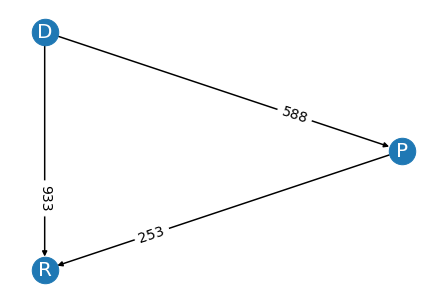

R  1289
P D  1081
P  568
R D  625
D P  639
D  456
P D R  962
R D P  885
D R  279
R P  153
D P R  693
P R  118
D R P  487
R P D  342
P R D  252


In [17]:
# restrict to the candidates R, D and P

restricted_prof = truncated_prof.remove_candidates([c for c in truncated_prof.candidates if cmap[c] not in ['P', 'R', 'D']])

restricted_prof.remove_empty_rankings()

restricted_prof.use_extended_strict_preference()

restricted_prof.display_margin_graph()

restricted_prof.display_rankings()